## Natural Language Processing (NLP) Assignment 1: Amazon Review 

Group Name: Sushil Basi (C0868003), Samir Khanal (C0869664), Sunil Thapa (C0846592), Bhavana Achanti (C0870503), Anusha Gundheti (C0865685)

Dataset and model Link: https://mylambton-my.sharepoint.com/:f:/g/personal/c0868003_mylambton_ca/EqdwlLTUSnhAhNj-0ENkov0B9eVg9byEm1LypOUYXZNzmA?e=wsTv7S


<b>Requirements:</b> <br>
    &nbsp; &nbsp; tensorflow_datasets <br>
    &nbsp; &nbsp; nltk <br>
    &nbsp; &nbsp; sklearn<br>
    &nbsp; &nbsp; seaborn<br>
    &nbsp; &nbsp; wordcloud<br>
    &nbsp; &nbsp; matplotlib<br>
    &nbsp; &nbsp; re<br>
    &nbsp; &nbsp; numpy<br>
    &nbsp; &nbsp; pandas<br>
    

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import tensorflow_datasets as tfds
import seaborn as sns
import matplotlib.pyplot as plt
import re
from wordcloud import WordCloud
import random

import nltk
from nltk.tokenize import RegexpTokenizer, WhitespaceTokenizer, word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split

from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

from sklearn.model_selection import train_test_split

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

Loading the US Amazon Reviews and spliting the train dataset.

In [2]:
dataset = tfds.load('amazon_us_reviews/Watches_v1_00', split='train', shuffle_files=True)

In [ ]:
df = tfds.as_dataframe(dataset)

In [ ]:
df.to_csv('Watches_v1_00.csv')

In [4]:
df = pd.read_csv('Watches_v1_00.csv')

In [5]:
df.columns

Index(['Unnamed: 0', 'customer_id', 'helpful_votes', 'marketplace',
       'product_category', 'product_id', 'product_parent', 'product_title',
       'review_body', 'review_date', 'review_headline', 'review_id',
       'star_rating', 'total_votes', 'verified_purchase', 'vine'],
      dtype='object')

In [6]:
# Dropping unwanted column
df.drop(columns='Unnamed: 0', inplace=True)

In [7]:
df.drop(columns=['review_id','product_id','vine','product_parent','review_headline'],inplace=True)

In [8]:
df.head()

,customer_id,helpful_votes,marketplace,product_category,product_title,review_body,review_date,star_rating,total_votes,verified_purchase
0,b'40915676',0,b'US',b'Watches',"b""U.S. Polo Assn. Sport Men's US9057 Black Met...","b""It's exactly how it looks like, the colors a...",b'2013-12-24',5,0,0
1,b'42279473',0,b'US',b'Watches',b'Burberry Mens BU7818 Utilitarian Black Leath...,b'Very happy!',b'2014-08-01',5,1,0
2,b'44311301',2,b'US',b'Watches',"b""Invicta Men's 5249S Pro Diver Stainless Stee...",b'Bought this watch for my husband as a weddin...,b'2013-06-13',1,2,0
3,b'42616791',0,b'US',b'Watches',"b""XOXO Women's XO3041 Black Dial Black Strap W...",b'A great Watch for my Nurse wife. This is Ok ...,b'2012-06-11',5,0,0
4,b'37080317',1,b'US',b'Watches',"b""Sector Men's R3253161003 Marine Stainless St...","b""I've had a sector diver watch before ,it la...",b'2014-07-20',5,1,0


In [9]:
df.dtypes

customer_id          object
helpful_votes         int64
marketplace          object
product_category     object
product_title        object
review_body          object
review_date          object
star_rating           int64
total_votes           int64
verified_purchase     int64
dtype: object

In [10]:
df['product_title'][0][1:][1:-1]

"U.S. Polo Assn. Sport Men's US9057 Black Metal Watch with Orange Rubber Band"

Removing the Delimiter from multiple features.

In [11]:
'''
Since the string on each record of object columns are stored as a "'...'", we need to remove the 
string quote on first and last occurence
'''
for d in df:
    if df[d].dtype != 'int64':
        df[d] = df[d].apply(lambda x: x[1:][1:-1])

In [12]:
df.head()

,customer_id,helpful_votes,marketplace,product_category,product_title,review_body,review_date,star_rating,total_votes,verified_purchase
0,40915676,0,US,Watches,U.S. Polo Assn. Sport Men's US9057 Black Metal...,"It's exactly how it looks like, the colors are...",2013-12-24,5,0,0
1,42279473,0,US,Watches,Burberry Mens BU7818 Utilitarian Black Leather...,Very happy!,2014-08-01,5,1,0
2,44311301,2,US,Watches,Invicta Men's 5249S Pro Diver Stainless Steel ...,Bought this watch for my husband as a wedding ...,2013-06-13,1,2,0
3,42616791,0,US,Watches,XOXO Women's XO3041 Black Dial Black Strap Watch,A great Watch for my Nurse wife. This is Ok bu...,2012-06-11,5,0,0
4,37080317,1,US,Watches,Sector Men's R3253161003 Marine Stainless Stee...,"I've had a sector diver watch before ,it last...",2014-07-20,5,1,0


### Analysis of the Raw Dataset through visualization.

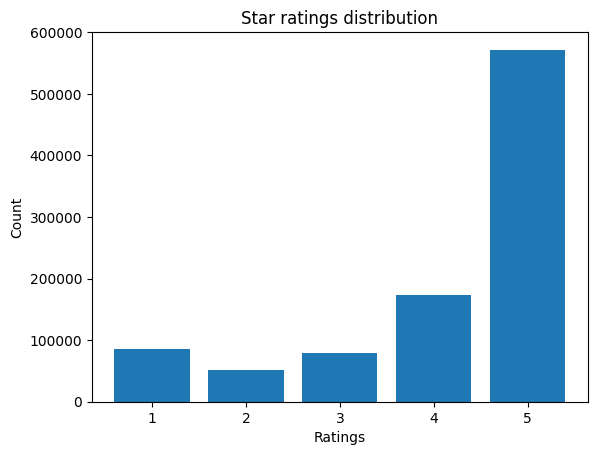

In [13]:
# Visualize the ratings using bar chart
count_ratings = df['star_rating'].value_counts().sort_index()
plt.bar(count_ratings.index, count_ratings.values)

plt.xlabel('Ratings')
plt.ylabel('Count')
plt.title('Star ratings distribution')
plt.show()

We have plotted the frequency of star ratings from 1 to 5. It is found that the rating with the most frequency is rating 5

In [14]:
df['verified_purchase'].value_counts()

0    831415
1    129457
Name: verified_purchase, dtype: int64

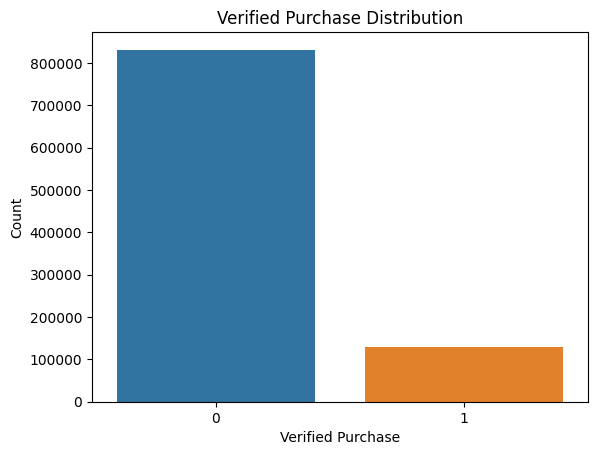

In [15]:
# Using seaborn to count the purchase made are verified or not
sns.countplot(x='verified_purchase', data=df)

plt.xlabel('Verified Purchase')
plt.ylabel('Count')
plt.title('Verified Purchase Distribution')
plt.show()

We have plotted the frequency of the number of verified purchases. We found out that there are some unverified purchases in the data.

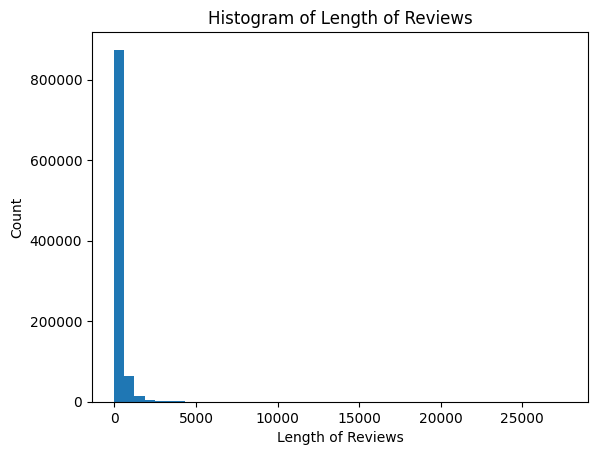

In [16]:
# Visualize the length of reviews
df['length_review'] = df['review_body'].apply(len)

plt.hist(df['length_review'], bins=45)
plt.title('Histogram of Length of Reviews')
plt.xlabel('Length of Reviews')
plt.ylabel('Count')
plt.show()

We have plotted the frequency of the length of each review. We found out that most of the reviews were short, and only some were long.

<AxesSubplot:xlabel='star_rating', ylabel='count'>

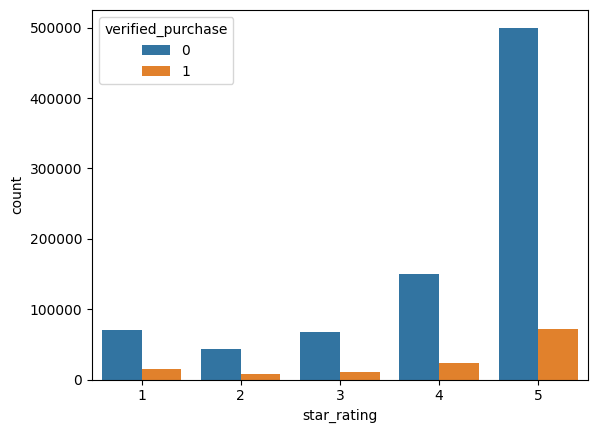

In [17]:
# Visualize the ratings of item by verified purchase
sns.countplot(x='star_rating', hue='verified_purchase', data=df)

This stacked bar plot show the the star rating of verified purchases.

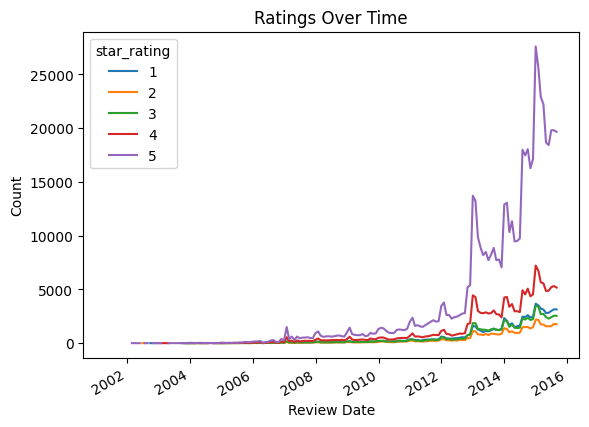

In [18]:
# Visualize Line chart of ratings over time
df['review_date'] = pd.to_datetime(df['review_date'], format='%Y-%m-%d')

# Group review_data by month end frequency over rating
date_grouped = df.groupby([pd.Grouper(key='review_date', freq='M'), 'star_rating']).size().unstack()
date_grouped.plot()
plt.xlabel('Review Date')
plt.ylabel('Count')
plt.title('Ratings Over Time')
plt.show()

We plotted the frequency of star ratings from 2002 to 2016. Before that, we converted the review_date attribute to a DateTime object. We found that positive ratings i.e, 5-star ratings started to peak in 2013. This means the watches have satisfied many customers, and its manufacturers have taken into account customer feedback and necessities for watches and their designs.

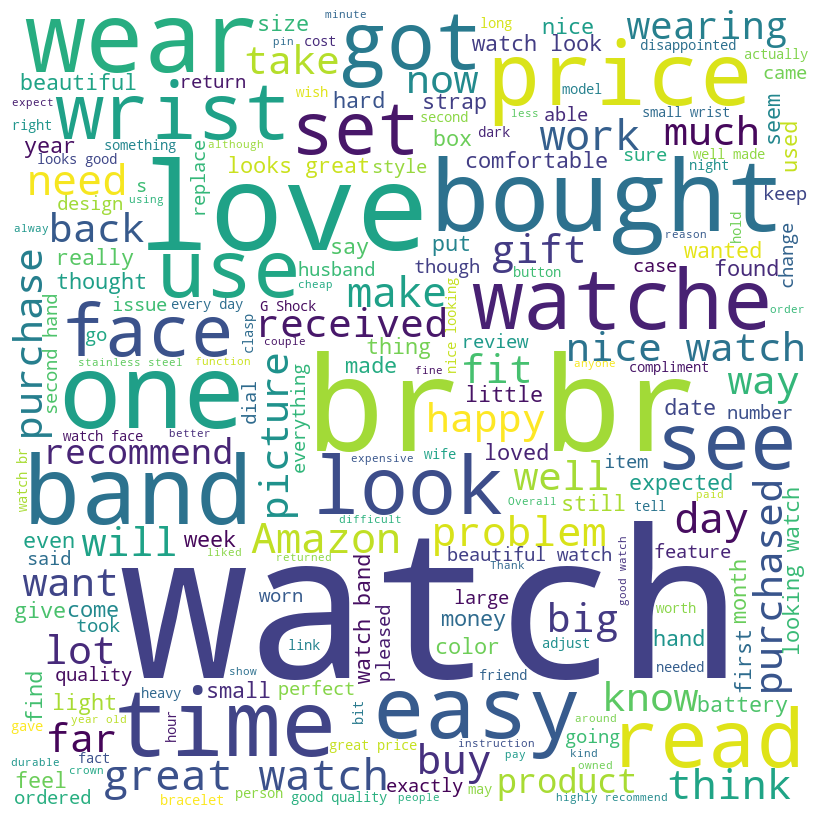

In [74]:
# Combine all review bodies into a single string
all_reviews = ' '.join(df['review_body'].tolist())

# Create a word cloud of the most frequent words
wordcloud = WordCloud(width=800, height=800, background_color='white').generate(all_reviews)

# Display the word cloud
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

We have plotted the word cloud for all the data. This is an initial word cloud of our dataset. Since the dataset comprises reviews regarding the watches, the most frequently occurring words are related to the watches.

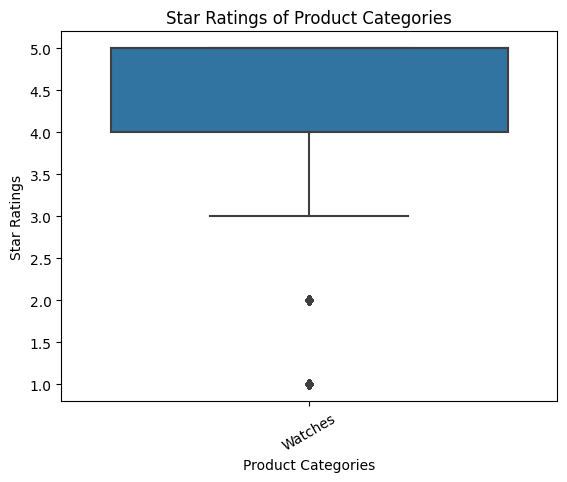

In [19]:
# Visualize category of product with respect to rating
sns.boxplot(x='product_category', y='star_rating', data=df)

plt.xticks(rotation=30)
plt.xlabel('Product Categories')
plt.ylabel('Star Ratings')
plt.title('Star Ratings of Product Categories')

plt.show()

This blox plot shows few outliers having rating 1 and 2 in the dataset. Also, this boxplot shows most reviews rating comes inside 4.0 to 5.0. 

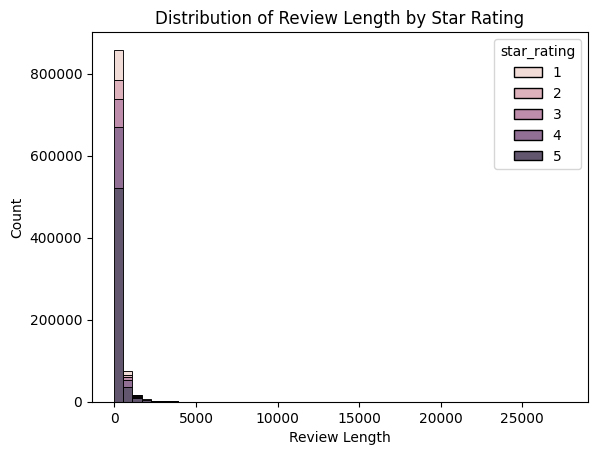

In [76]:
# Create a new column with the length of each review body
df['review_length'] = df['review_body'].apply(len)

# Create a histogram of review length by star rating
sns.histplot(x='review_length', hue='star_rating', data=df, multiple='stack', bins=50)

# Add labels and title
plt.xlabel('Review Length')
plt.ylabel('Count')
plt.title('Distribution of Review Length by Star Rating')

# Show the chart
plt.show()

We have plotted the frequency of Review length by ratings. We found out that high star ratings are short, and less ratings contain long reviews.

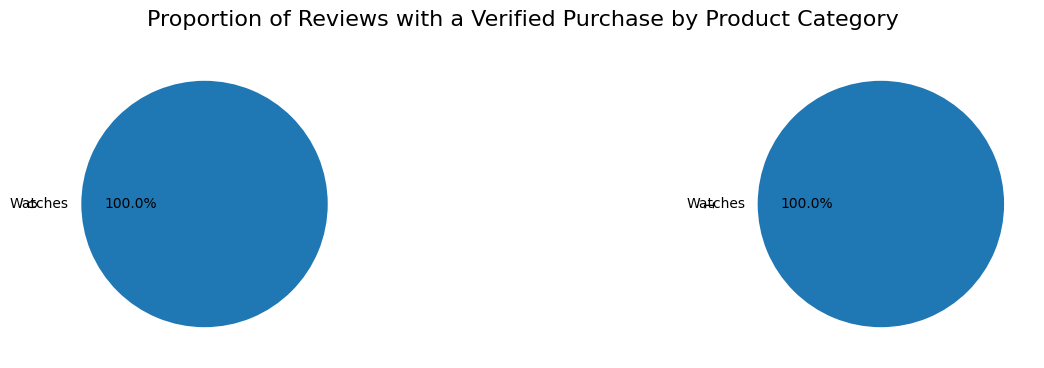

In [77]:
# Group the dataframe by product category and calculate the proportion of reviews with a verified purchase
grouped_df = df.groupby('product_category')['verified_purchase'].value_counts(normalize=True).unstack().fillna(0)

# Create a pie chart of the proportion of reviews with a verified purchase by product category
grouped_df.plot(kind='pie', subplots=True, figsize=(16, 4), autopct='%1.1f%%', legend=False)

# Add title
plt.suptitle('Proportion of Reviews with a Verified Purchase by Product Category', fontsize=16)

# Show the chart
plt.show()

In [105]:
df["Sentiment"] = df["star_rating"].apply(lambda score: "positive" if score >= 3 else "negative")
df['Sentiment'] = df['Sentiment'].map({'positive':1, 'negative':0})
# df['short_review'] =df['review_body'].str.decode("utf-8")
df['short_review'] =df['review_body']

In [106]:
neg_df = df[df['Sentiment'] == 0].head(20000)
pos_df = df[df['Sentiment'] == 1].head(20000)
dfs = [neg_df, pos_df]
random.shuffle(dfs)
new_df = pd.concat(dfs)

In [107]:
new_df.shape

(40000, 18)

In [108]:
# Distribution of positive 1 and negative 0 sentiments
new_df['Sentiment'].value_counts() 

1    20000
0    20000
Name: Sentiment, dtype: int64

In [109]:
# Total number of null values in each features.
new_df.isnull().sum()

Unnamed: 0           0
customer_id          0
helpful_votes        0
marketplace          0
product_category     0
product_id           0
product_parent       0
product_title        0
review_body          0
review_date          0
review_headline      0
review_id            0
star_rating          0
total_votes          0
verified_purchase    0
vine                 0
Sentiment            0
short_review         0
dtype: int64

In [110]:
# Export 40K data rows in CSV formate.
new_df.to_csv('dataset_40k.csv')

## Data Wrangling

In [69]:
# import dataset.
df = pd.read_csv('dataset_40k.csv')

In [70]:
# Selecting two featues Sentiment (label) and short review.
df = df[['Sentiment', 'short_review']]

In [71]:
df.head()

,Sentiment,short_review
0,1,"b""It's exactly how it looks like, the colors a..."
1,1,b'Very happy!'
2,1,b'A great Watch for my Nurse wife. This is Ok ...
3,1,"b""I've had a sector diver watch before ,it la..."
4,1,"b""I have several different models. This is my ..."


In [72]:
df['Sentiment'].value_counts()

1    20000
0    20000
Name: Sentiment, dtype: int64

In [73]:
df.shape

(40000, 2)

This dataframe has 40k reviews with its sentiment.

In [74]:
df.sample

<bound method NDFrame.sample of        Sentiment                                       short_review
0              1  b"It's exactly how it looks like, the colors a...
1              1                                     b'Very happy!'
2              1  b'A great Watch for my Nurse wife. This is Ok ...
3              1  b"I've  had a sector diver watch before ,it la...
4              1  b"I have several different models. This is my ...
...          ...                                                ...
39995          0  b"It's a shorter band then others I've purchas...
39996          0  b"Save yourself and do not buy anything from t...
39997          0  b"Watch didn't work and took over a week to co...
39998          0  b'Timex watch arrived but did not have the chr...
39999          0  b"I didn't get to wear it for only a couple of...

[40000 rows x 2 columns]>

In [75]:
# Removing the delimiter from short review
for d in df:
    if df[d].dtype != 'int64':
        df[d] = df[d].apply(lambda x: x[1:][1:-1])

In [76]:
df.sample(10)

,Sentiment,short_review
15328,1,Well I just got it so I can't comment on relia...
15951,1,The ticker is SO LOUD. Otherwise it's a gorgeo...
11887,1,This watch band seems to be of decent quality ...
13937,1,I am quite the watch nut and own over 30. Bran...
21825,0,after 3 months stopped work
3628,1,Didn't realize it was big. This piece is eye c...
3659,1,I really like this watch because it is so gorg...
29945,0,The plastic (Corn resin case) is weak and brok...
3275,1,My big Invicta watches call attention to their...
33045,0,I like the colour............that's about it.<...


#### Funtions for preprocessing the raw reviews.

In [77]:
pattern = '&(amp|lt|gt);?'
pattern_replace_map = {
    '&lt;': '<',
    '&gt;': '>',
    '&amp;': 'and'
}

# Define a function to replace the matches with their corresponding values
def replace_match(match):
    return pattern_replace_map[match.group(0)]


def review_process(review_text: str) -> str:
    """
        Processes the review text to remove any non-ascii characters.
        
        ### Parameters:
        text: str
            review text

        ### Returns:
        str:
            A string only containing ascii characters 
    """
    review_text = re.sub('https://\S+|http://\S+', '', review_text) # Remove whole links
    review_text = re.sub(pattern, replace_match, review_text) # Converting html tags references
    review_text = re.sub('\d+', '', review_text) # removing numbers from text
    # Remove new lines, mentions, hastags, and multiple spaces
    review_text = re.sub('[\r\n]+', ' ', review_text) 
    review_text = re.sub(r'@\w+', '', review_text)
    review_text = re.sub(r'#\w+', '', review_text)
    review_text = re.sub('\s+', ' ', review_text)
    review_text = re.sub(r"\b\d{4}-\d{2}-\d{2}\b|\b\d{2}:\d{2}:\d{2}\b", "", review_text) # Remove datetime string
    return review_text.lower()

In [78]:
df['processed_review'] = df['short_review'].apply(review_process)

In [79]:
df

,Sentiment,short_review,processed_review
0,1,"It's exactly how it looks like, the colors are...","it's exactly how it looks like, the colors are..."
1,1,Very happy!,very happy!
2,1,A great Watch for my Nurse wife. This is Ok bu...,a great watch for my nurse wife. this is ok bu...
3,1,"I've had a sector diver watch before ,it last...","i've had a sector diver watch before ,it laste..."
4,1,I have several different models. This is my cu...,i have several different models. this is my cu...
...,...,...,...
39995,0,It's a shorter band then others I've purchased...,it's a shorter band then others i've purchased...
39996,0,Save yourself and do not buy anything from thi...,save yourself and do not buy anything from thi...
39997,0,Watch didn't work and took over a week to cont...,watch didn't work and took over a week to cont...
39998,0,Timex watch arrived but did not have the chron...,timex watch arrived but did not have the chron...


Removed any non-ascii characters from short_review and created new column processed_review.

In [80]:
def filter_words(text: str) -> str:
    """
        If words length is less than 2 remove it.
        ### Parameters:
        text: str
            Tweet text

        ### Returns:
        str: 
            A string with words larger than 2 length 
    """
    words = text
    filtered_words = [word for word in words if len(word) > 2]
    return filtered_words

In [81]:
# Keeping only english words
pattern = r'[^\x00-\x7F]+'
def keep_english_words(text: str) -> str:
    """
        Keep only english words in the text.

        ### Parameters:
        text: str
            Tweet text

        ### Returns:
        str: 
            A string only containing english words 
    """
    return re.sub(pattern, '', text)

In [82]:
df['processed_review'] = df['processed_review'].apply(keep_english_words)

In [83]:
df.loc[35623]

Sentiment                                                           0
short_review        **Update**<br />06/10/13<br />Less than 6 mont...
processed_review    **update**<br />//<br />less than months after...
Name: 35623, dtype: object

In [84]:
def remove_html_rag(text:str)->str:
    """
        Remove html tag from the text.

        ### Parameters:
        text: str
            Tweet text

        ### Returns:
        str: 
            cleaned text.
    """
    
    temp_1 = re.findall(r'<[a-zA-Z]+\s{0,}>', text)
    temp_2 = re.findall(r'<[a-zA-Z]+\s{0,}/>', text)
    temp_list = temp_1 + temp_2
    for item in temp_list:
        text = text.replace(item, ' ')
    
    return text
    
    

In [85]:
# Removing html tags
df['processed_review'] = df['processed_review'].apply(remove_html_rag)

In [86]:
df.loc[35623]

Sentiment                                                           0
short_review        **Update**<br />06/10/13<br />Less than 6 mont...
processed_review    **update** // less than months after purchasin...
Name: 35623, dtype: object

In [87]:
def remove_punct(text: str) -> str:
    """
        Remove punctuation from a string.

        ### Parameters 
        text: str 
            The string to remove punctuation from.

        ### Returns
        text: str
            The string with punctuation removed.
    """
    text = re.sub(r'[!"\$%&\'()*+,\-.\/:;=#@?\[\\\]^_`{|}~]*','',text)
    return text

In [88]:
# Removing Punctuation
df['remove_punct'] = df['processed_review'].apply(remove_punct)

In [89]:
df.head()

,Sentiment,short_review,processed_review,remove_punct
0,1,"It's exactly how it looks like, the colors are...","it's exactly how it looks like, the colors are...",its exactly how it looks like the colors are b...
1,1,Very happy!,very happy!,very happy
2,1,A great Watch for my Nurse wife. This is Ok bu...,a great watch for my nurse wife. this is ok bu...,a great watch for my nurse wife this is ok but...
3,1,"I've had a sector diver watch before ,it last...","i've had a sector diver watch before ,it laste...",ive had a sector diver watch before it lasted ...
4,1,I have several different models. This is my cu...,i have several different models. this is my cu...,i have several different models this is my cur...


Removed the punctuation symbol from the text and created new column named remove_punct.

In [90]:
df.loc[35623]

Sentiment                                                           0
short_review        **Update**<br />06/10/13<br />Less than 6 mont...
processed_review    **update** // less than months after purchasin...
remove_punct        update  less than months after purchasing this...
Name: 35623, dtype: object

In [91]:
# tokenized
df['tokenized'] = df['remove_punct'].apply(word_tokenize)
df.head()

,Sentiment,short_review,processed_review,remove_punct,tokenized
0,1,"It's exactly how it looks like, the colors are...","it's exactly how it looks like, the colors are...",its exactly how it looks like the colors are b...,"[its, exactly, how, it, looks, like, the, colo..."
1,1,Very happy!,very happy!,very happy,"[very, happy]"
2,1,A great Watch for my Nurse wife. This is Ok bu...,a great watch for my nurse wife. this is ok bu...,a great watch for my nurse wife this is ok but...,"[a, great, watch, for, my, nurse, wife, this, ..."
3,1,"I've had a sector diver watch before ,it last...","i've had a sector diver watch before ,it laste...",ive had a sector diver watch before it lasted ...,"[ive, had, a, sector, diver, watch, before, it..."
4,1,I have several different models. This is my cu...,i have several different models. this is my cu...,i have several different models this is my cur...,"[i, have, several, different, models, this, is..."


Tokenized the remove_punct and created new column tokenized

In [92]:
stop_words = stopwords.words("english")
stop_words = set(stop_words)

def remove_stopwords(text: list) -> list:
    """
        Removes stopwords from text.

        ### Parameters
        text: str 
            list of words
        
        ### Returns
        list:
            list of words without stopwords
    """
    text_list = [word for word in text if word.lower() not in stop_words]
    return text_list

In [93]:
# Removing stopwords
df['remove_stopwords'] = df['tokenized'].apply(remove_stopwords)
df['cleaned_tokens'] = df['remove_stopwords'].apply(filter_words)
df

,Sentiment,short_review,processed_review,remove_punct,tokenized,remove_stopwords,cleaned_tokens
0,1,"It's exactly how it looks like, the colors are...","it's exactly how it looks like, the colors are...",its exactly how it looks like the colors are b...,"[its, exactly, how, it, looks, like, the, colo...","[exactly, looks, like, colors, bright, cant, w...","[exactly, looks, like, colors, bright, cant, w..."
1,1,Very happy!,very happy!,very happy,"[very, happy]",[happy],[happy]
2,1,A great Watch for my Nurse wife. This is Ok bu...,a great watch for my nurse wife. this is ok bu...,a great watch for my nurse wife this is ok but...,"[a, great, watch, for, my, nurse, wife, this, ...","[great, watch, nurse, wife, ok, expendable, lo...","[great, watch, nurse, wife, expendable, lookin..."
3,1,"I've had a sector diver watch before ,it last...","i've had a sector diver watch before ,it laste...",ive had a sector diver watch before it lasted ...,"[ive, had, a, sector, diver, watch, before, it...","[ive, sector, diver, watch, lasted, years, sec...","[ive, sector, diver, watch, lasted, years, sec..."
4,1,I have several different models. This is my cu...,i have several different models. this is my cu...,i have several different models this is my cur...,"[i, have, several, different, models, this, is...","[several, different, models, current, favorite...","[several, different, models, current, favorite..."
...,...,...,...,...,...,...,...
39995,0,It's a shorter band then others I've purchased...,it's a shorter band then others i've purchased...,its a shorter band then others ive purchasedst...,"[its, a, shorter, band, then, others, ive, pur...","[shorter, band, others, ive, purchasedstrap, b...","[shorter, band, others, ive, purchasedstrap, b..."
39996,0,Save yourself and do not buy anything from thi...,save yourself and do not buy anything from thi...,save yourself and do not buy anything from thi...,"[save, yourself, and, do, not, buy, anything, ...","[save, buy, anything, seller, first, products,...","[save, buy, anything, seller, first, products,..."
39997,0,Watch didn't work and took over a week to cont...,watch didn't work and took over a week to cont...,watch didnt work and took over a week to conta...,"[watch, didnt, work, and, took, over, a, week,...","[watch, didnt, work, took, week, contact, some...","[watch, didnt, work, took, week, contact, some..."
39998,0,Timex watch arrived but did not have the chron...,timex watch arrived but did not have the chron...,timex watch arrived but did not have the chron...,"[timex, watch, arrived, but, did, not, have, t...","[timex, watch, arrived, chrono, function, use,...","[timex, watch, arrived, chrono, function, use,..."


Removed stopwords and created new column remove_stopwords. We used function named filter_words for removing words with length less than 2. 

In [94]:
def get_pos_tag(text_list: list) -> list:
    """
        Returns a list of POS tags for the given list of words.

        ### Parameters
        text_list: list
            A list of words

        ### Returns
        list:
            A list of POS tags
    """
    return nltk.pos_tag(text_list)

In [95]:
# getting part of speech 
df['pos_tag'] = df['cleaned_tokens'].apply(get_pos_tag)
df.head()

,Sentiment,short_review,processed_review,remove_punct,tokenized,remove_stopwords,cleaned_tokens,pos_tag
0,1,"It's exactly how it looks like, the colors are...","it's exactly how it looks like, the colors are...",its exactly how it looks like the colors are b...,"[its, exactly, how, it, looks, like, the, colo...","[exactly, looks, like, colors, bright, cant, w...","[exactly, looks, like, colors, bright, cant, w...","[(exactly, RB), (looks, VBZ), (like, IN), (col..."
1,1,Very happy!,very happy!,very happy,"[very, happy]",[happy],[happy],"[(happy, JJ)]"
2,1,A great Watch for my Nurse wife. This is Ok bu...,a great watch for my nurse wife. this is ok bu...,a great watch for my nurse wife this is ok but...,"[a, great, watch, for, my, nurse, wife, this, ...","[great, watch, nurse, wife, ok, expendable, lo...","[great, watch, nurse, wife, expendable, lookin...","[(great, JJ), (watch, NN), (nurse, JJ), (wife,..."
3,1,"I've had a sector diver watch before ,it last...","i've had a sector diver watch before ,it laste...",ive had a sector diver watch before it lasted ...,"[ive, had, a, sector, diver, watch, before, it...","[ive, sector, diver, watch, lasted, years, sec...","[ive, sector, diver, watch, lasted, years, sec...","[(ive, JJ), (sector, NN), (diver, NN), (watch,..."
4,1,I have several different models. This is my cu...,i have several different models. this is my cu...,i have several different models this is my cur...,"[i, have, several, different, models, this, is...","[several, different, models, current, favorite...","[several, different, models, current, favorite...","[(several, JJ), (different, JJ), (models, NNS)..."


Assigned the Part of Speech for each words in cleaned tokens using nltk pos_tag. A new column is created with assigned pos tag. 

In [96]:
lemmatizer = WordNetLemmatizer()
def word_pos_lemmetize(text_list: list) -> list:
    """
        Return a list of words with lemma form.

        ### Parameters
        text_list: list
            A list of words.

        ### Returns
        list:
            A list of words converted to lemma form.
    """
    new_lemmetize_list = []
    for text, tag in text_list:
        text = text.lower()
        if tag.startswith('N'):
            wld = lemmatizer.lemmatize(text, pos='n')
        elif tag.startswith('V'):
            wld = lemmatizer.lemmatize(text, pos='v')
        elif tag.startswith('J'):
            wld = lemmatizer.lemmatize(text, pos='a')
        elif tag.startswith('R'):
            wld = lemmatizer.lemmatize(text, pos='r')
        else:
            wld = text
        new_lemmetize_list.append(wld)
    return new_lemmetize_list

In [97]:
# lemmatizing the pos_tag column.
df['text_lemmatizer'] = df['pos_tag'].apply(word_pos_lemmetize)

In [98]:
df.head()

,Sentiment,short_review,processed_review,remove_punct,tokenized,remove_stopwords,cleaned_tokens,pos_tag,text_lemmatizer
0,1,"It's exactly how it looks like, the colors are...","it's exactly how it looks like, the colors are...",its exactly how it looks like the colors are b...,"[its, exactly, how, it, looks, like, the, colo...","[exactly, looks, like, colors, bright, cant, w...","[exactly, looks, like, colors, bright, cant, w...","[(exactly, RB), (looks, VBZ), (like, IN), (col...","[exactly, look, like, color, bright, cant, wai..."
1,1,Very happy!,very happy!,very happy,"[very, happy]",[happy],[happy],"[(happy, JJ)]",[happy]
2,1,A great Watch for my Nurse wife. This is Ok bu...,a great watch for my nurse wife. this is ok bu...,a great watch for my nurse wife this is ok but...,"[a, great, watch, for, my, nurse, wife, this, ...","[great, watch, nurse, wife, ok, expendable, lo...","[great, watch, nurse, wife, expendable, lookin...","[(great, JJ), (watch, NN), (nurse, JJ), (wife,...","[great, watch, nurse, wife, expendable, look, ..."
3,1,"I've had a sector diver watch before ,it last...","i've had a sector diver watch before ,it laste...",ive had a sector diver watch before it lasted ...,"[ive, had, a, sector, diver, watch, before, it...","[ive, sector, diver, watch, lasted, years, sec...","[ive, sector, diver, watch, lasted, years, sec...","[(ive, JJ), (sector, NN), (diver, NN), (watch,...","[ive, sector, diver, watch, last, year, sector..."
4,1,I have several different models. This is my cu...,i have several different models. this is my cu...,i have several different models this is my cur...,"[i, have, several, different, models, this, is...","[several, different, models, current, favorite...","[several, different, models, current, favorite...","[(several, JJ), (different, JJ), (models, NNS)...","[several, different, model, current, favorite,..."


Lemmatized the words using the Part of Speech and transformed each word into it's base form.

In [99]:
def convert_list_to_str(text_list: list) -> str:
    """
        Convert a list of strings to a string.

        ### Parameters
        text_list: list
            A list of strings

        ### Returns
        str:
            A text of string
    """
    str_text = ''
    for i in text_list:
        str_text += i +' '
    return str_text

In [100]:
# Joing list of lemmatized words.
all_text = " ".join(df['text_lemmatizer'].apply(convert_list_to_str))

### Visualization of textual data

In [101]:
word_cloud = WordCloud(
    width=3000,
    height=3000,
    stopwords=STOPWORDS,
    mode="RGBA",
    background_color='white',
).generate(all_text)

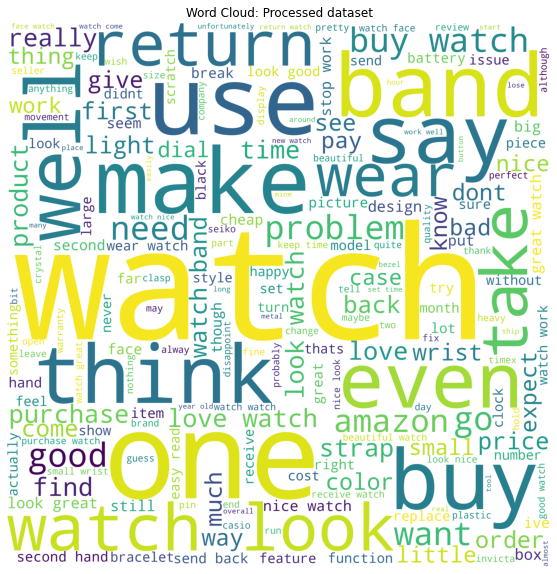

In [102]:
plt.figure(figsize=(10, 10), facecolor=None)
plt.imshow(word_cloud)
plt.axis('off')
plt.title("Word Cloud: Processed dataset")
plt.show()

Word Cloud from preprocess data. For this word cloud, we have joined all the word from lemmatized columns. 

As seen from the word cloud, the watch's looks, band, and some other features impact a positive sentiment toward the buyers.

### Generating N-grams

In [103]:
def get_n_gram(corpus: pd.Series, n: int=None, range: tuple=(2, 2)) -> list:
    """
        Returns n-grams from a corpus.

        ### Parameters
        corpus: pd.Series
            A dataframe series containing corpus.
        n: int 
            The number of n-grams to return.
        range: tuple
            The range of n-grams to return.

        ### Returns
        list: 
            List of top occurring n-grams
    """
    count_vector = CountVectorizer(ngram_range=range, stop_words='english').fit(corpus)
    bag_of_words =  count_vector.fit_transform(corpus)
    bg_sum = bag_of_words.sum(axis=0)
    words_freq = [(word, bg_sum[0, idx]) for word, idx in count_vector.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:n]

In [104]:
# getting bi common words
bi_common_words = get_n_gram(df['processed_review'], 15)

In [105]:
bi_common_words

[('watch looks', 1328),
 ('bought watch', 1316),
 ('watch band', 1264),
 ('great watch', 1155),
 ('looking watch', 1152),
 ('love watch', 1143),
 ('nice watch', 1042),
 ('looks great', 940),
 ('stopped working', 939),
 ('second hand', 851),
 ('looks like', 805),
 ('easy read', 788),
 ('watch face', 749),
 ('like watch', 706),
 ('beautiful watch', 695)]

In [106]:
def visualization_n_gram(common_words: list, title: str) -> None:
    """
        Visualization of n-grams
        
        ### Parameters
        common_words: list
            list of common n_gram words 
            >>> [('chat gpt', 596),
                    ('character limit', 259),
                ]
        title: str
            Title of graph
        ### Return
        None
    """
    # Create a dataframe 
    vis_df = pd.DataFrame(common_words, columns=['Tweet', 'Count'])
    vis_df.plot(x='Tweet', y='Count', kind='bar', title=title, figsize=(8, 8))

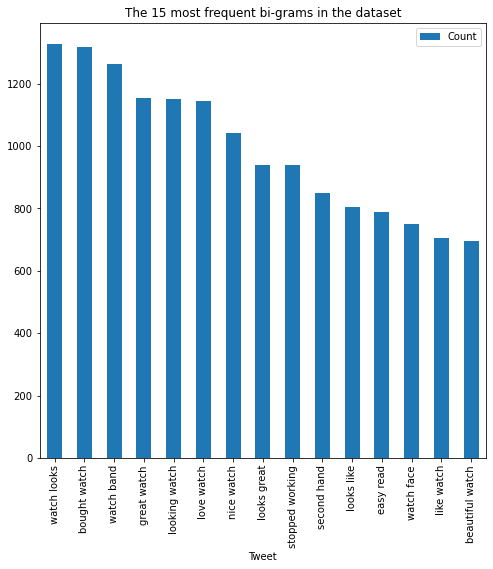

In [107]:
visualization_n_gram(common_words=bi_common_words, title='The 15 most frequent bi-grams in the dataset')

We have used CountVectorizer to find the bi-gram. This bar plot shows the 15 most frequent bi-gram in processed data. According to the bi-gram "watch looks" has the highest frequency of count 1500+ in the dataset.

In [108]:
# getting tri common words
tri_common_words = get_n_gram(df['processed_review'], 15, range=(3,3))
tri_common_words

[('nice looking watch', 330),
 ('watch looks great', 257),
 ('watch stopped working', 234),
 ('great looking watch', 211),
 ('good looking watch', 203),
 ('watch looks good', 170),
 ('keeps good time', 169),
 ('really like watch', 137),
 ('don waste money', 123),
 ('watch looks like', 120),
 ('watch looks nice', 117),
 ('watch great price', 105),
 ('keeps perfect time', 105),
 ('highly recommend watch', 96),
 ('keeps great time', 83)]

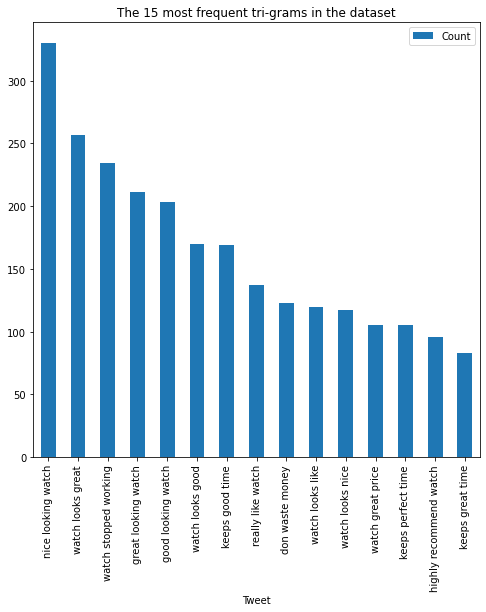

In [109]:
visualization_n_gram(common_words=tri_common_words, title='The 15 most frequent tri-grams in the dataset')

We have used CountVectorizer to find the tri-gram. This bar plot shows the 15 most frequent tri-gram in processed data. According to the bi-gram "nice looking watch" has the highest frequency of count 500+ in the dataset.

### Word Vectorization

In [110]:
df.head()

,Sentiment,short_review,processed_review,remove_punct,tokenized,remove_stopwords,cleaned_tokens,pos_tag,text_lemmatizer
0,1,"It's exactly how it looks like, the colors are...","it's exactly how it looks like, the colors are...",its exactly how it looks like the colors are b...,"[its, exactly, how, it, looks, like, the, colo...","[exactly, looks, like, colors, bright, cant, w...","[exactly, looks, like, colors, bright, cant, w...","[(exactly, RB), (looks, VBZ), (like, IN), (col...","[exactly, look, like, color, bright, cant, wai..."
1,1,Very happy!,very happy!,very happy,"[very, happy]",[happy],[happy],"[(happy, JJ)]",[happy]
2,1,A great Watch for my Nurse wife. This is Ok bu...,a great watch for my nurse wife. this is ok bu...,a great watch for my nurse wife this is ok but...,"[a, great, watch, for, my, nurse, wife, this, ...","[great, watch, nurse, wife, ok, expendable, lo...","[great, watch, nurse, wife, expendable, lookin...","[(great, JJ), (watch, NN), (nurse, JJ), (wife,...","[great, watch, nurse, wife, expendable, look, ..."
3,1,"I've had a sector diver watch before ,it last...","i've had a sector diver watch before ,it laste...",ive had a sector diver watch before it lasted ...,"[ive, had, a, sector, diver, watch, before, it...","[ive, sector, diver, watch, lasted, years, sec...","[ive, sector, diver, watch, lasted, years, sec...","[(ive, JJ), (sector, NN), (diver, NN), (watch,...","[ive, sector, diver, watch, last, year, sector..."
4,1,I have several different models. This is my cu...,i have several different models. this is my cu...,i have several different models this is my cur...,"[i, have, several, different, models, this, is...","[several, different, models, current, favorite...","[several, different, models, current, favorite...","[(several, JJ), (different, JJ), (models, NNS)...","[several, different, model, current, favorite,..."


### Bag of words

In [111]:
#bag of words
count = CountVectorizer()
bag_of_words = count.fit_transform(df['text_lemmatizer'].apply(lambda x: " ".join(x)).tolist())
bag_of_words

<40000x29533 sparse matrix of type '<class 'numpy.int64'>'
	with 832125 stored elements in Compressed Sparse Row format>

In [145]:
# Spliting the test and train with test size 0.25
X_train, X_test, Y_train, Y_test = train_test_split(bag_of_words, df['Sentiment'], test_size=0.25, random_state=5)

#### MultinomialNB

In [113]:
MNB = MultinomialNB()
MNB.fit(X_train, Y_train)

MultinomialNB()

In [114]:
# Classificaiton Report on X test
predicted_X_test = MNB.predict(X_test)
print(metrics.classification_report(predicted_X_test, Y_test))

              precision    recall  f1-score   support

           0       0.82      0.87      0.85      4791
           1       0.87      0.83      0.85      5209

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



In [115]:
# Classificaiton Report on X train
predicted_X_train = MNB.predict(X_train)
print(metrics.classification_report(predicted_X_train, Y_train))

              precision    recall  f1-score   support

           0       0.86      0.90      0.88     14368
           1       0.90      0.87      0.89     15632

    accuracy                           0.88     30000
   macro avg       0.88      0.88      0.88     30000
weighted avg       0.88      0.88      0.88     30000



Bag of Word: According to evalution Matric of Train and test, Multinomial NB algorithm performed well on both the training and test sets, with higher precision, recall, F1 score, and accuracy on the training set than on the test set. This suggests that the model may have overfit to the training data, but is still performing well on unseen data.

#### MultinomialNB: Confusion Matrix

Text(0.5, 1.0, 'MNB: Confusion Matrix on Y Test')

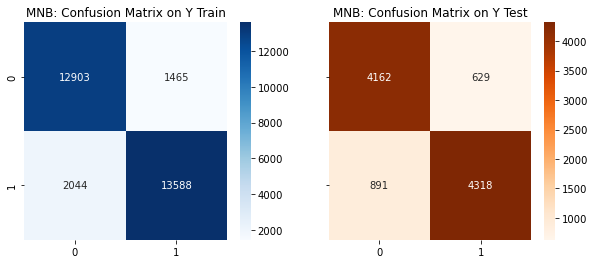

In [116]:
cf_matrix1 = metrics.confusion_matrix(predicted_X_train, Y_train)
cf_matrix2 = metrics.confusion_matrix(predicted_X_test, Y_test)
# labels = ['True Neg','False Pos','False Neg','True Pos']
# labels = np.asarray(labels).reshape(2,2)

fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True, figsize=(10,4))
sns.heatmap(cf_matrix1, annot=cf_matrix1, fmt='', cmap='Blues', ax=ax1)
ax1.set_title('MNB: Confusion Matrix on Y Train')

sns.heatmap(cf_matrix2, annot=cf_matrix2, fmt='', cmap='Oranges', ax=ax2)
ax2.set_title('MNB: Confusion Matrix on Y Test')

### RandomForestClassifier

In [146]:
rfc = RandomForestClassifier()
rfc.fit(X_train, Y_train)

RandomForestClassifier()

In [118]:
# Classificaiton Report on X Train
predicted_X_train = rfc.predict(X_train)
print(metrics.classification_report(predicted_X_train, Y_train))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     14881
           1       1.00      0.99      1.00     15119

    accuracy                           1.00     30000
   macro avg       1.00      1.00      1.00     30000
weighted avg       1.00      1.00      1.00     30000



In [119]:
# Classificaiton Report on X test
predicted_X_test = rfc.predict(X_test)
print(metrics.classification_report(predicted_X_test, Y_test))

              precision    recall  f1-score   support

           0       0.89      0.84      0.87      5340
           1       0.83      0.88      0.86      4660

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



Bag Of Word: According to evalution Matric of Train and test, the Random Forest Classifier algorithm performed exceptionally well on the training set with perfect precision, recall, F1 score, and accuracy, suggesting that the model has learned the training data well. However, on the test set, the model's performance decreased slightly, with lower precision and F1 score, indicating that the model may be overfitting to the training data. Nevertheless, the model still performs well on the test set with an accuracy of 0.86.

Text(0.5, 1.0, 'Confusion Matrix on Y Test')

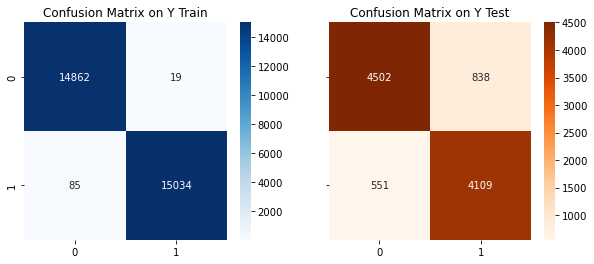

In [120]:
cf_matrix1 = metrics.confusion_matrix(predicted_X_train, Y_train)
cf_matrix2 = metrics.confusion_matrix(predicted_X_test, Y_test)
# labels = ['True Neg','False Pos','False Neg','True Pos']
# labels = np.asarray(labels).reshape(2,2)

fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True, figsize=(10,4))
sns.heatmap(cf_matrix1, annot=cf_matrix1, fmt='', cmap='Blues', ax=ax1)
ax1.set_title('Confusion Matrix on Y Train')

sns.heatmap(cf_matrix2, annot=cf_matrix2, fmt='', cmap='Oranges', ax=ax2)
ax2.set_title('Confusion Matrix on Y Test')

### Bag of Words to DataFrame

In [121]:
df_bow = pd.DataFrame(bag_of_words.toarray(), columns=count.get_feature_names_out())
df_bow.sample(10)

,aaa,aaaaaand,aaahs,aabout,aacutegua,aagain,aamazon,aan,aaround,aatos,...,zoo,zoom,zoomed,zootsuit,zub,zucker,zuedel,zulu,zurich,zwlaszcza
23326,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10181,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8905,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5153,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30038,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
727,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5247,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24320,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
36779,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5363,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [122]:
df_bow.shape

(40000, 29533)

In [123]:
bow_features = " ".join(list(count.get_feature_names_out()))
bow_features[:100]

'aaa aaaaaand aaahs aabout aacutegua aagain aamazon aan aaround aatos ababa abaca abacas aback abacus'

# TFIDF

In [124]:
# tfidf
vectorizer = TfidfVectorizer(stop_words='english', ngram_range=(1, 3))
X = vectorizer.fit_transform(df['text_lemmatizer'].map(lambda x: ' '.join(x)).tolist())

In [125]:
# Spliting the Train and Test
X_train, X_test, Y_train, Y_test = train_test_split(X, df['Sentiment'], test_size=0.25, random_state=5)

#### MultinomialNB

In [126]:
MNB = MultinomialNB()
MNB.fit(X_train, Y_train)

MultinomialNB()

In [127]:
X_test.shape, Y_test.shape

((10000, 1043194), (10000,))

In [128]:
# Classificaiton Report on X test
predicted_X_test = MNB.predict(X_test)
print(metrics.classification_report(predicted_X_test, Y_test))

              precision    recall  f1-score   support

           0       0.88      0.86      0.87      5159
           1       0.86      0.88      0.87      4841

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



In [129]:
# Classificaiton Report on X train
predicted_X_train = MNB.predict(X_train)
print(metrics.classification_report(predicted_X_train, Y_train))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98     15027
           1       0.97      0.98      0.98     14973

    accuracy                           0.98     30000
   macro avg       0.98      0.98      0.98     30000
weighted avg       0.98      0.98      0.98     30000



TFIDF: According to evalution Matric of Train and test, The Multinomial Naive Bayes algorithm performed well on both the training and test sets, with higher performance metrics on the training set. The algorithm achieved high precision, recall, F1 score, and accuracy on the training set, and slightly lower performance on the test set, indicating potential overfitting to the training data.

#### MultinominalNB: Confusion Matrix

Text(0.5, 1.0, 'MNB: Confusion Matrix on Y Test')

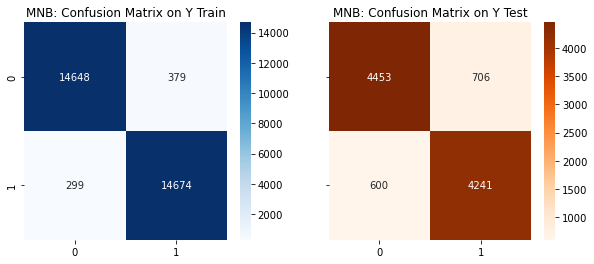

In [130]:
cf_matrix1 = metrics.confusion_matrix(predicted_X_train, Y_train)
cf_matrix2 = metrics.confusion_matrix(predicted_X_test, Y_test)
# labels = ['True Neg','False Pos','False Neg','True Pos']
# labels = np.asarray(labels).reshape(2,2)

fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True, figsize=(10,4))
sns.heatmap(cf_matrix1, annot=cf_matrix1, fmt='', cmap='Blues', ax=ax1)
ax1.set_title('MNB: Confusion Matrix on Y Train')

sns.heatmap(cf_matrix2, annot=cf_matrix2, fmt='', cmap='Oranges', ax=ax2)
ax2.set_title('MNB: Confusion Matrix on Y Test')

#### Random Forest Classifier

In [131]:
rfc = RandomForestClassifier()
rfc.fit(X_train, Y_train)

RandomForestClassifier()

In [132]:
# Classificaiton Report on X Train
predicted_X_train = rfc.predict(X_train)
print(metrics.classification_report(predicted_X_train, Y_train))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     14871
           1       1.00      0.99      1.00     15129

    accuracy                           1.00     30000
   macro avg       1.00      1.00      1.00     30000
weighted avg       1.00      1.00      1.00     30000



In [133]:
# Classificaiton Report on X test
predicted_X_test = rfc.predict(X_test)
print(metrics.classification_report(predicted_X_test, Y_test))

              precision    recall  f1-score   support

           0       0.88      0.85      0.87      5240
           1       0.84      0.87      0.86      4760

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



TFIDF: According to evalution Matric of Train and test, Random Forest Classifier is a machine learning algorithm commonly used for classification tasks. The algorithm performed exceptionally well on the training set with perfect precision, recall, F1 score, and accuracy, suggesting that the model has learned the training data well. On the test set, the model's performance decreased slightly, but still performed well with a precision of 0.84, recall of 0.87, F1 score of 0.86, and accuracy of 0.86, indicating the model's ability to generalize to unseen data.

#### Random Forest Classifier : Confusion Matrix

Text(0.5, 1.0, 'Confusion Matrix on Y Test')

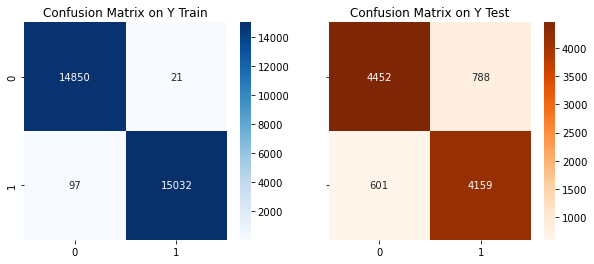

In [134]:
cf_matrix1 = metrics.confusion_matrix(predicted_X_train, Y_train)
cf_matrix2 = metrics.confusion_matrix(predicted_X_test, Y_test)
# labels = ['True Neg','False Pos','False Neg','True Pos']
# labels = np.asarray(labels).reshape(2,2)

fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True, figsize=(10,4))
sns.heatmap(cf_matrix1, annot=cf_matrix1, fmt='', cmap='Blues', ax=ax1)
ax1.set_title('Confusion Matrix on Y Train')

sns.heatmap(cf_matrix2, annot=cf_matrix2, fmt='', cmap='Oranges', ax=ax2)
ax2.set_title('Confusion Matrix on Y Test')

#### Exporting the Model

In [147]:
import pickle
save_classifier = open("random_forest_classifier_bow.pkl", "wb")
pickle.dump(rfc, save_classifier)
save_classifier.close()

In [136]:
# load the model from disk
# classifier = open("random_forest_classifier_tfidf.pkl", 'rb')
# classifier = pickle.load(classifier)
# classifier.close()

#### TFIDF TO DATAFRAME

In [137]:
df_tfidf = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

In [138]:
df_tfidf.sample(10)

,aaa,aaa battery,aaa battery buy,aaa battery come,aaa battery run,aaa duracell,aaa duracell battery,aaa open,aaa open box,aaaaaand,...,zulu time timer,zulu time work,zulu utc,zulu utc gmt,zurich,zurich make,zurich make authenticated,zwlaszcza,zwlaszcza jego,zwlaszcza jego skorzana
19232,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28388,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16359,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8394,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
36088,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19773,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
39672,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15647,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
31210,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [139]:
df_tfidf.shape

(40000, 1043194)

In [140]:
tfidf_features = " ".join(list(vectorizer.get_feature_names_out()))
tfidf_features[:100]

'aaa aaa battery aaa battery buy aaa battery come aaa battery run aaa duracell aaa duracell battery a'

# Word Cloud for Different Vectorizers

In [141]:
#Bag of words -- word cloud
word_cloud_bow = WordCloud(
    width=3000,
    height=3000,
    stopwords=STOPWORDS,
    mode="RGBA",
    background_color='white',
).generate(bow_features)

#tfidf word cloud
word_cloud_tfidf= WordCloud(
    width=3000,
    height=3000,
    stopwords=STOPWORDS,
    mode="RGBA",
    background_color='white',
).generate(tfidf_features)

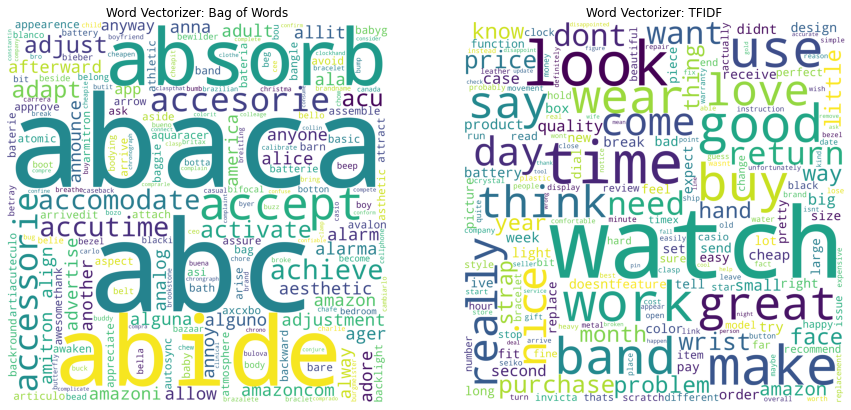

In [142]:
fig , ax  = plt.subplots(1, 2, figsize=(15,15), facecolor=None)
# plt.figure(figsize=(8, 8), facecolor=None)
ax[0].imshow(word_cloud_bow)
ax[0].axis('off')
ax[0].set_title("Word Vectorizer: Bag of Words")

ax[1].imshow(word_cloud_tfidf)
ax[1].axis('off')
ax[1].set_title("Word Vectorizer: TFIDF")
plt.show()